# Regression Example: Predict the Price of a House
Here we will use some housing data to predict the price of a house based on a number of data points.
The data contains a lot of issues we will need to solve before we can get a result:

* String values (all features need to be numbers so we can do math on them)
* null values
* NaN values
* enumerable values (e.g. Sale Condition = ["Normal", "Abnormal", "Partial",...])
* Some of the data points may not be relevant to the sale price
* Some data points might be best combined into a single data point (added or multiplied)

We won't have time to address all of the issues, but let's explore some of them by importing the data and using dataframes and matplotlib to visualize it.

In [41]:
# Import the common packages for exploring Machine Learning
%matplotlib notebook
import numpy as np  # <-- common convention for short names of packages...
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:
# Load housing data into DataFrame (Pandas reads & writes CSVs and many other data formats)
# data source: linked from https://ww2.amstat.org/publications/jse/v19n3/decock.pdf 

# Download this file to our Jupyter filesystem
!wget https://jse.amstat.org/v19n3/decock/AmesHousing.txt;
# file is 'Tab Separated' with a generic extension, so tell Pandas which separator to use:  \t
df = pd.read_csv('AmesHousing.txt',sep='\t');

--2025-09-10 20:26:49--  https://jse.amstat.org/v19n3/decock/AmesHousing.txt
Resolving jse.amstat.org (jse.amstat.org)... 192.124.249.169
Connecting to jse.amstat.org (jse.amstat.org)|192.124.249.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960807 (938K) [text/plain]
Saving to: ‘AmesHousing.txt.2’

AmesHousing.txt.2   100%[===================>] 938.29K  2.86MB/s    in 0.3s    

2025-09-10 20:26:50 (2.86 MB/s) - ‘AmesHousing.txt.2’ saved [960807/960807]



In [43]:
# DataFrames in Pandas are easy to sample or use head(n) or tail(n)

# df.head(3)
# df.tail(3)
df.sample(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
461,462,528186180,120,RL,48.0,6240,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,254000
2444,2445,528315080,60,RL,83.0,9545,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,300000
432,433,528110020,20,RL,105.0,13693,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,3,2009,WD,Normal,610000
2763,2764,906420020,60,RL,80.0,10041,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,220000
1563,1564,914453045,20,RL,NaN,23730,Pave,NaN,IR2,Lvl,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,300000
2615,2616,535425040,20,RL,80.0,10800,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,183000
834,835,906475070,60,RL,NaN,28698,Pave,NaN,IR2,Low,...,0,NaN,NaN,NaN,0,6,2009,WD,Abnorml,185000
1404,1405,905403060,50,RL,50.0,5190,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,125600
2577,2578,535178100,80,RL,125.0,10000,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal,148000
174,175,902125080,50,RM,60.0,5790,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,107400


In [44]:
# Wow, 82 is lots of columns - let's sort them so we can find what we're looking for more easily
df.columns.sort_values()

Index(['1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Alley', 'Bedroom AbvGr',
       'Bldg Type', 'Bsmt Cond', 'Bsmt Exposure', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Bsmt Qual', 'Bsmt Unf SF', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Central Air',
       'Condition 1', 'Condition 2', 'Electrical', 'Enclosed Porch',
       'Exter Cond', 'Exter Qual', 'Exterior 1st', 'Exterior 2nd', 'Fence',
       'Fireplace Qu', 'Fireplaces', 'Foundation', 'Full Bath', 'Functional',
       'Garage Area', 'Garage Cars', 'Garage Cond', 'Garage Finish',
       'Garage Qual', 'Garage Type', 'Garage Yr Blt', 'Gr Liv Area',
       'Half Bath', 'Heating', 'Heating QC', 'House Style', 'Kitchen AbvGr',
       'Kitchen Qual', 'Land Contour', 'Land Slope', 'Lot Area', 'Lot Config',
       'Lot Frontage', 'Lot Shape', 'Low Qual Fin SF', 'MS SubClass',
       'MS Zoning', 'Mas Vnr Area', 'Mas Vnr Type', 'Misc Feature', 'Misc Val',
       'Mo Sold', 'Neighborhood', 'Open Porch S

In [45]:
# Maybe we want to grab just a subset of data columns - it's easy with Pandas. 
# Don't forget the double [[]] syntax for multiple selections

# let's start with the easy stuff and grab only the numeric columns
df2 = df[['SalePrice','Lot Area','Bedroom AbvGr','Year Built','Yr Sold','1st Flr SF', '2nd Flr SF','BsmtFin SF 1','BsmtFin SF 2']]
df2.head(3)

,SalePrice,Lot Area,Bedroom AbvGr,Year Built,Yr Sold,1st Flr SF,2nd Flr SF,BsmtFin SF 1,BsmtFin SF 2
0,215000,31770,3,1960,2010,1656,0,639.0,0.0
1,105000,11622,2,1961,2010,896,0,468.0,144.0
2,172000,14267,3,1958,2010,1329,0,923.0,0.0


In [46]:
# Maybe you want to use Pandas Dataframes to engineer a new aggregate feature column
# It's easy to do opeations across columns (eg. add all the Square Footage columns into a new one 'Total SF')
df3 = pd.DataFrame(df2['1st Flr SF']+df2['2nd Flr SF']+df2['BsmtFin SF 1']+df2['BsmtFin SF 2'], columns=['Total SF'])
df3.head(5)

,Total SF
0,2295.0
1,1508.0
2,2252.0
3,3175.0
4,2420.0


In [47]:
# Combining DataFrame's is easy to
# use 'axis=1' for adding columns (features); 'axis=0' for more rows (examples)
df4 = pd.concat([df2,df3],axis=1) 
df4.sample(3) # <-- now we have a new 'Total SF' feature column appended

,SalePrice,Lot Area,Bedroom AbvGr,Year Built,Yr Sold,1st Flr SF,2nd Flr SF,BsmtFin SF 1,BsmtFin SF 2,Total SF
1120,212700,8640,3,2007,2008,1372,0,24.0,0.0,1396.0
1903,64000,3500,2,1945,2007,442,228,144.0,0.0,814.0
727,44000,9392,2,1900,2009,797,0,0.0,0.0,797.0


## Let's Try a Simple Linear Regression

In [48]:
# Let's see if we can predict a Sale Price based on single feature 'Gross Living Area'
# Create a new DataFrame with only the data we need
data = df[['SalePrice','Gr Liv Area']]
data.head(5)

,SalePrice,Gr Liv Area
0,215000,1656
1,105000,896
2,172000,1329
3,244000,2110
4,189900,1629


In [49]:
# sklearn complains if these are shape [100,] vs [100,1]
# just one of the many gotchas you'll find :)
X = data['Gr Liv Area'].values.reshape(-1,1) 
# Y is typically used for the Truth Labels
Y = data['SalePrice'].values.reshape(-1,1)

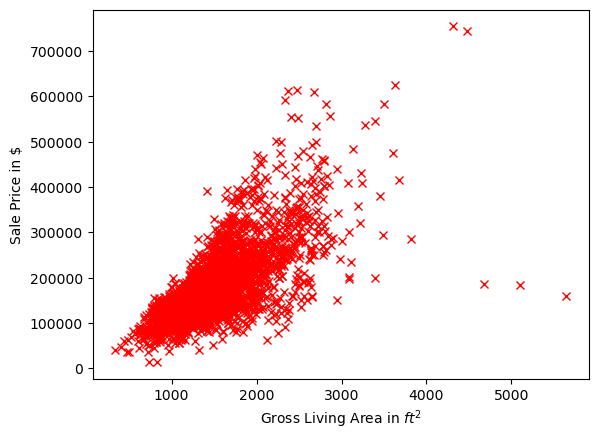

In [50]:
%matplotlib inline

# Let's plot Square Foot vs Sale Price to understand our data
plt.xlabel('Gross Living Area in $ft^2$')
plt.ylabel('Sale Price in $')
plt.plot(X,Y,'rx');

## Let's Split the Data so We Can Evaluate How We'll We Can Predict

In [97]:
# use SKLearns builtin method to split our data & shuffle it into test & train
# Split the data into training/testing sets
# By default, train_test_split will split the data into 75%/25% train/test
housing_X_train, housing_X_test, housing_Y_train, housing_Y_test = train_test_split(
    X,Y,
    random_state=3
)
print('housing_X_train',len(housing_X_train),'examples')
print('housing_X_test',len(housing_X_test),'examples')

# Create linear regression object WITHOUT normalize
regr = LinearRegression()

# Create linear regression object
#regr = linear_model.LinearRegression(normalize=True)
#regr = linear_model.SGDRegressor(n_iter=100)

housing_X_train 2197 examples
housing_X_test 733 examples


In [98]:
# The fit function will train the model using the training set
regr.fit(housing_X_train, housing_Y_train)

LinearRegression()

In [99]:
# Make predictions using the testing set
housing_Y_pred = regr.predict(housing_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# TODO: this number is huge...
print("Mean squared error: %.2f" % mean_squared_error(housing_Y_test, housing_Y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(housing_Y_test, housing_Y_pred))

Coefficients: 
 [[110.47104527]]
Mean squared error: 2942072587.24
Variance score: 0.51


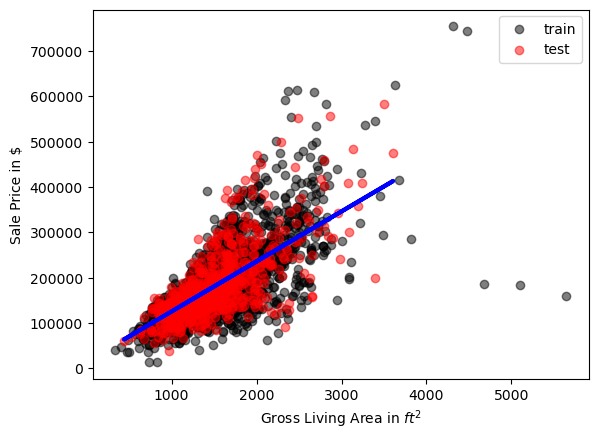

In [100]:
%matplotlib inline
# Plot outputs
plt.scatter(housing_X_train, housing_Y_train, alpha=.5, color='black', label='train')
plt.scatter(housing_X_test, housing_Y_test, alpha=.5, color='red', label='test')
plt.plot(housing_X_test, housing_Y_pred,color='blue', linewidth=3)

plt.xticks()
plt.yticks()
plt.legend()
plt.xlabel('Gross Living Area in $ft^2$')
plt.ylabel('Sale Price in $')

plt.show();

This looks OK, but how well did we really do?

Let's create a histogram showing how off we were from the truth.

If our model is good, we'll have a lot of hits in the middle and a nice tall bell curve. 

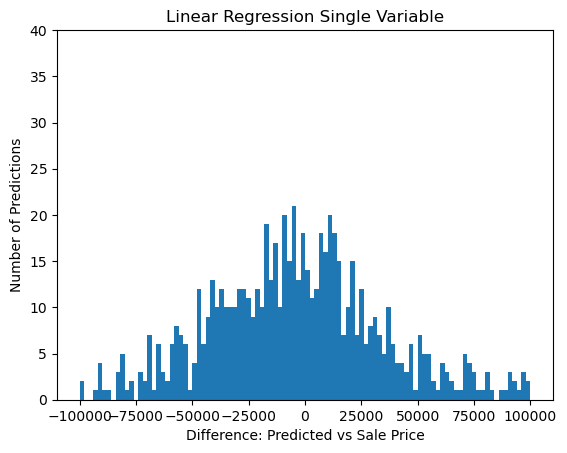

In [101]:
%matplotlib inline

# Plot hist of predictions vs actual
y_lr = np.reshape(housing_Y_test,housing_Y_test.shape[0])
yhat_lr = np.reshape(housing_Y_pred,housing_Y_pred.shape[0])
ydiff_lr = np.subtract(y_lr,yhat_lr)

plt.ylim([0,40])
plt.hist(ydiff_lr,bins=100,range=[-100000, 100000])
plt.title('Linear Regression Single Variable')
plt.xlabel('Difference: Predicted vs Sale Price')
plt.ylabel('Number of Predictions')

plt.show();

This doesn't look that great.

We can do better if we consider multiple features of data and use a more complex model.

## Adding a Neural Network

> Before creating a neural network, pop over to [Tensorflow Playground](http://playground.tensorflow.org/) and we'll play with it visually to understand what a neural network is doing.

![playground.tensorflow.org](images/playground.tensorflow.org.png)


## Run a Basic Network
For simplicity, let's start with just using all of the numerical columns in the data.
We aren't going to worry about featurizing non-numeric fields yet since there is probably useful data already in the dataset that won't require a lot of work to setup.

There are a lot of neural networks and tools to choose from. In this example, we are going to use an [MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), built into scikit-learn

['Gr Liv Area', '1st Flr SF', '2nd Flr SF', '3Ssn Porch', 'Bedroom AbvGr', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Enclosed Porch', 'Fireplaces', 'Full Bath', 'Garage Area', 'Garage Cars', 'Garage Yr Blt', 'Half Bath', 'Kitchen AbvGr', 'Lot Area', 'Lot Frontage', 'Low Qual Fin SF', 'Mas Vnr Area', 'Mo Sold', 'Open Porch SF', 'Pool Area', 'TotRms AbvGrd', 'Total Bsmt SF', 'Wood Deck SF', 'Year Built', 'Year Remod/Add', 'Yr Sold']
(2930, 31)
(2930, 1)
housing_X_train 2197 examples
housing_X_test 733 examples

Linear Regression (Single variable) VARIANCE: 0.51
NN MLP Regression (Multi variable) VARIANCE: 0.84 64% (1.64x) over 1 variable linear regression


<Axes: >

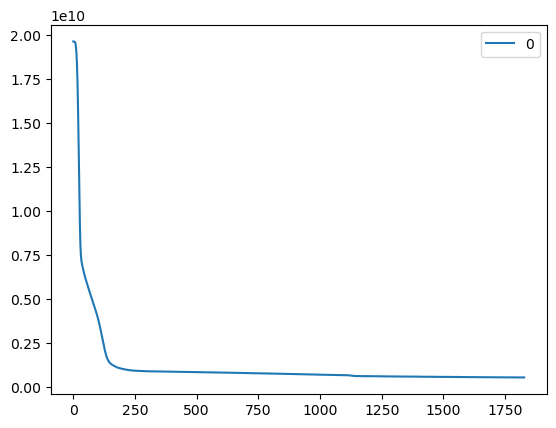

In [102]:
# sklearn.neural_network.MLPRegressor
# sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, 
# batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, 
# random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, 
# early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
from sklearn.neural_network import MLPRegressor

# Use all numerical columns to predict 'SalePrice'
columns = list([
    'Gr Liv Area', # this is our single linear regression point of reference
    # can we do better by adding these other features?
    '1st Flr SF', 
    '2nd Flr SF', 
    '3Ssn Porch', 
    'Bedroom AbvGr',
    'Bsmt Full Bath',
    'Bsmt Half Bath', 
    'Bsmt Unf SF', 
    'BsmtFin SF 1',
    'BsmtFin SF 2',
    'Enclosed Porch',
    'Fireplaces',
    'Full Bath',
    'Garage Area', 
    'Garage Cars',
    'Garage Yr Blt', 
    'Half Bath', 
    'Kitchen AbvGr',
    'Lot Area',
    'Lot Frontage', 
    'Low Qual Fin SF',
    'Mas Vnr Area',
    'Mo Sold', 
    'Open Porch SF',
    'Pool Area',
    'TotRms AbvGrd', 
    'Total Bsmt SF',
    'Wood Deck SF', 
    'Year Built', 
    'Year Remod/Add', 
    'Yr Sold'
])
print(columns)
# Create new dataframe with columns
X_NN = df[columns]
print(X_NN.shape)
#sklearn complains if these are shape [100,] vs [100,1]
Y_NN = df['SalePrice'].values.reshape(-1,1)
print(Y_NN.shape)
# remove NaN values & replace with 0's
X_NN = X_NN.fillna(0)
X_NN = X_NN.values # convert to plain NumPy array

# TODO: scaling & centering data
# scale & center our data
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_NN);

# use SKLearns builtin method to split our data & shuffle it into test & train
# Split the data into training/testing sets
housing_X_train_nn, housing_X_test_nn, housing_Y_train_nn, housing_Y_test_nn = train_test_split(
    X_scaled,Y_NN,
    random_state=2# what if we lock down the random seed number? (set to 1, 3, 10, or False)
)
print('housing_X_train',len(housing_X_train_nn),'examples')
print('housing_X_test',len(housing_X_test_nn),'examples')

score1 = r2_score(housing_Y_test, housing_Y_pred)
print('\nLinear Regression (Single variable) VARIANCE:',round(score1,2))


# you can run this multiple times to check the variable starting points
# each run will be different--and may be significantly difference since the initialization variables will change
# and that will affect how the model converges
# for i in range(2,8): # try setting one of the variables to i
# Explore settings logarithmically (0.1, 0.01, 0.001, 0.00001)
nn_regr = MLPRegressor(
    # what if we change our layer sizes?
    hidden_layer_sizes=(2,8,2), 
    # what if we change our learning rate?
    learning_rate_init=0.01,
    # what if we change our activation function? (relu, tanh, identity)
    activation='relu',
    max_iter=2000,
    random_state=2, # if set to None, this is random, to an int, static seed
    # set this to True to see how well we are learning over the iterations
    verbose=False
);

# Train it
nn_regr.fit(housing_X_train_nn,housing_Y_train_nn.reshape(housing_Y_train_nn.size))

# Make predictions using the testing set
housing_Y_pred_nn = nn_regr.predict(housing_X_test_nn)

# Variance scores or Linear Regression vs NN
score2 = r2_score(housing_Y_test_nn, housing_Y_pred_nn)

#print("Mean squared error: %.2f" % mean_squared_error(housing_Y_test_nn, housing_Y_pred_nn))
# Explained variance score: 1 is perfect prediction
answer = ((score2-score1)/score1)*100
print(
    'NN MLP Regression (Multi variable) VARIANCE: {} {:0.0f}% ({:0.2f}x) over 1 variable linear regression'.format(
        round(score2,2), answer, score2/score1
    )
)


pd.DataFrame(nn_regr.loss_curve_).plot()

## So How is That Bell Curve?

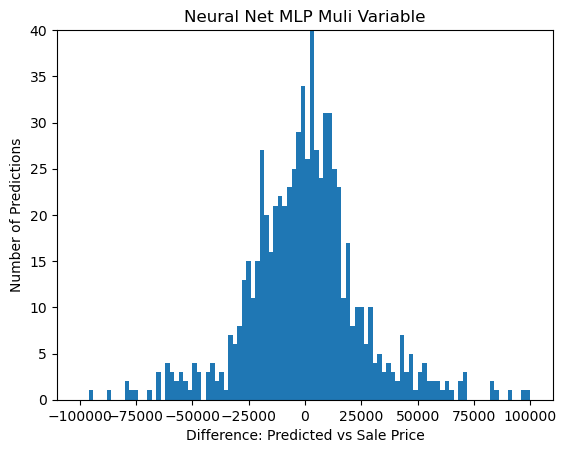

In [104]:
%matplotlib inline

# Plot histogram of difference between predicted & actual sale price outputs
y_nn = np.reshape(housing_Y_test_nn,housing_Y_test_nn.shape[0])
yhat_nn = np.reshape(housing_Y_pred_nn,housing_Y_pred_nn.shape[0])
ydiff = np.subtract(y_nn,yhat_nn)

plt.ylim([0,40])
plt.hist(ydiff,bins=100,range=[-100000, 100000])

plt.title('Neural Net MLP Muli Variable')
plt.xlabel('Difference: Predicted vs Sale Price')
plt.ylabel('Number of Predictions')

plt.show();

That's significantly better!

But can we do even better?

## Let's Visualize The Relationship Each Feature Has With Price

We can plot a chart of each feature mapped to the sales price to easily see how a feature corresponds to the rising price.

If a feature doesn't show a correlation with increased price, this is not likely a good feature for our model to consider--and we can omit it from the data. If your dataset is large enough, a good neural network will learn to ignore meaningless or redundant data (more data is usually better), but if your dataset isn't large enough or if extra features are [spurriously correlated](http://www.tylervigen.com/spurious-correlations), they can cause chaos within your network.

31


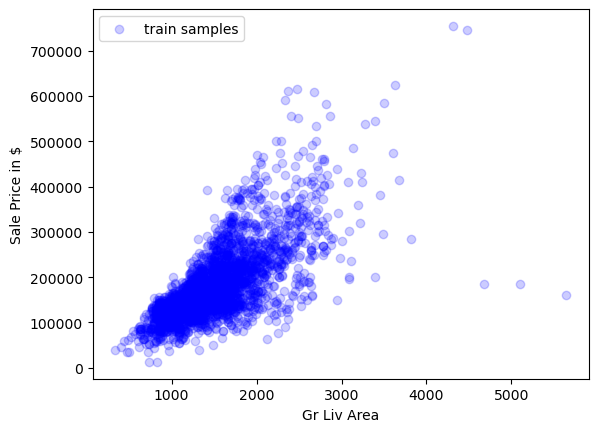

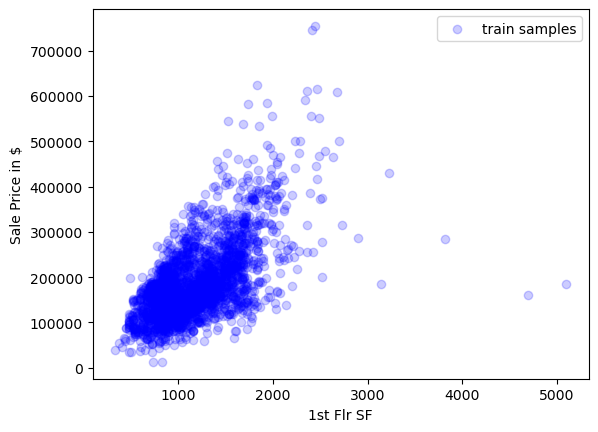

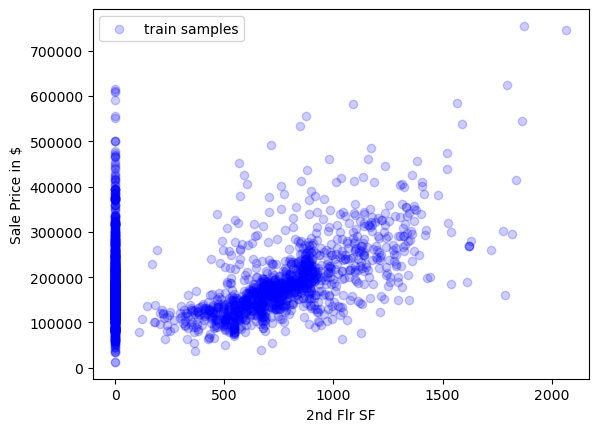

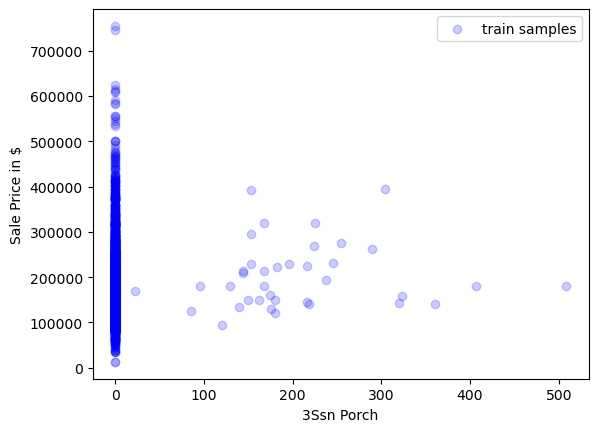

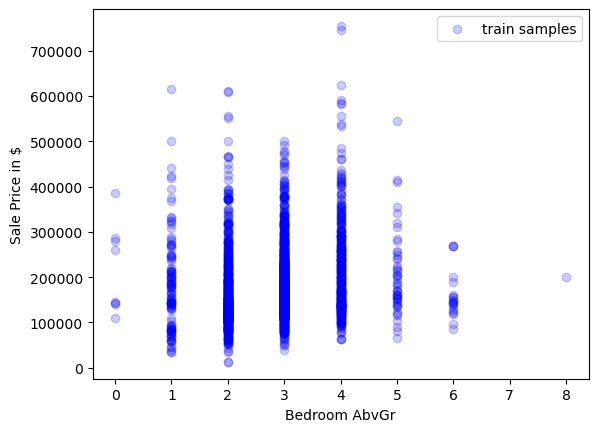

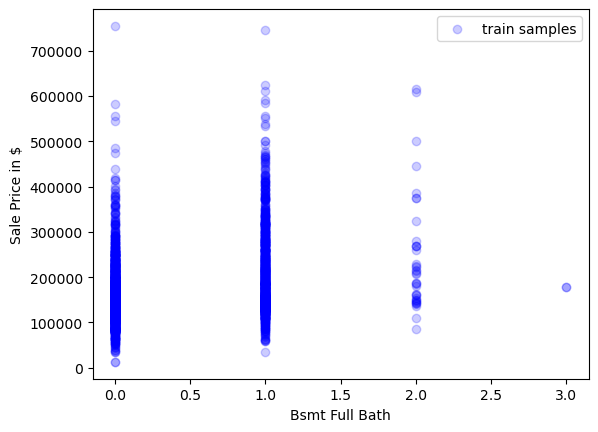

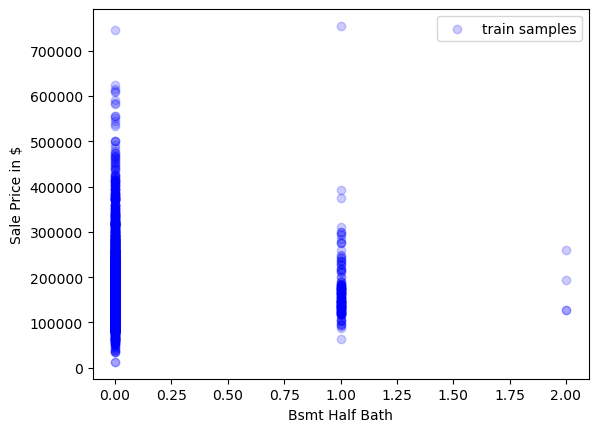

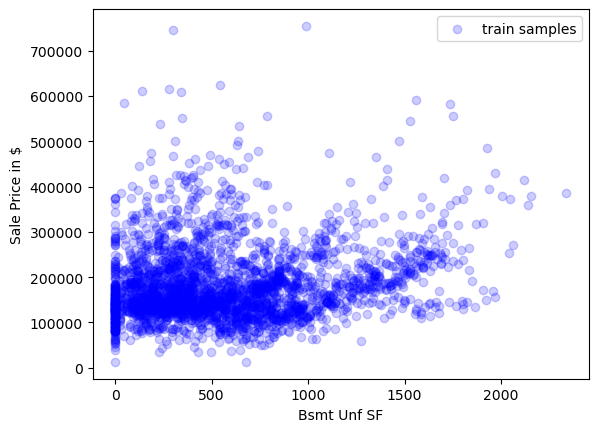

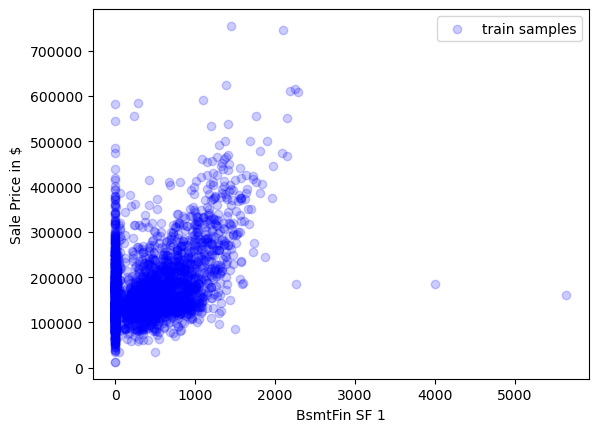

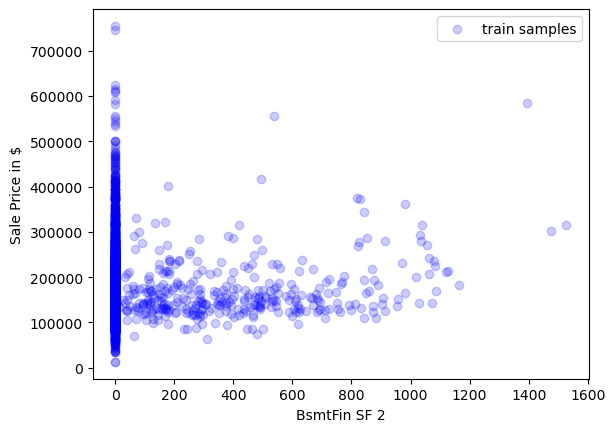

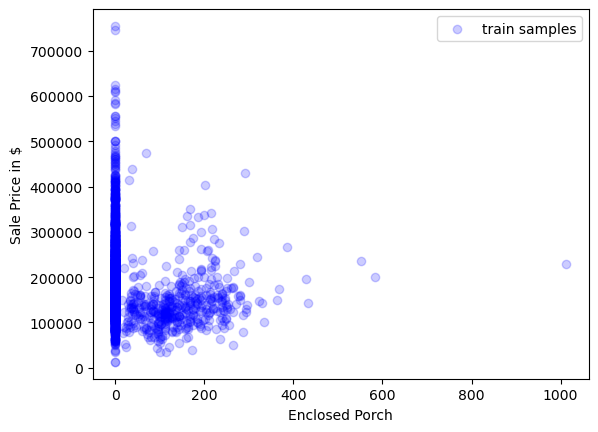

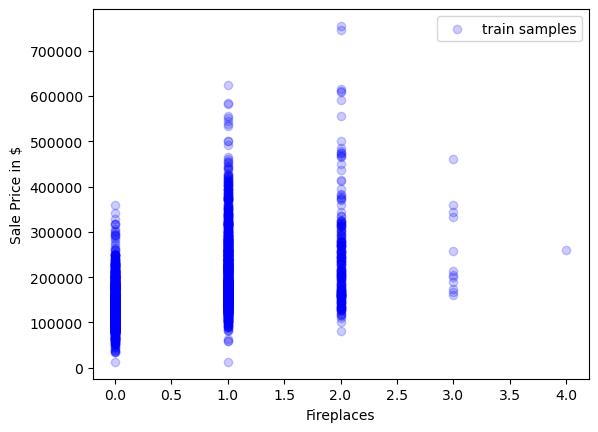

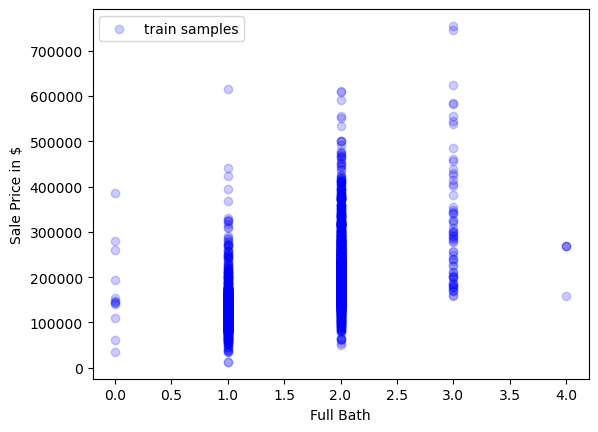

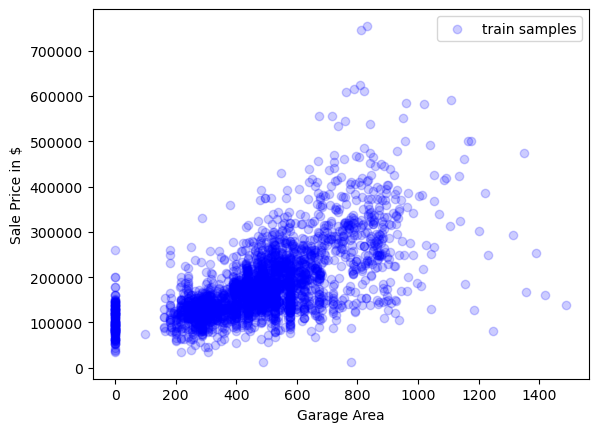

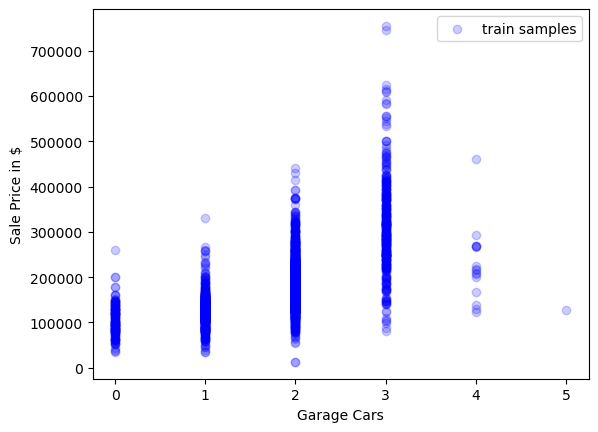

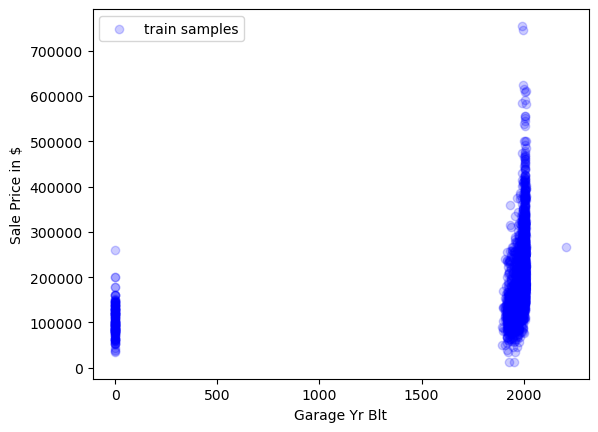

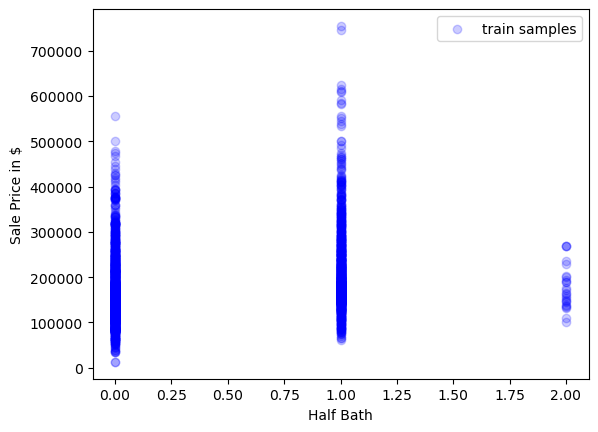

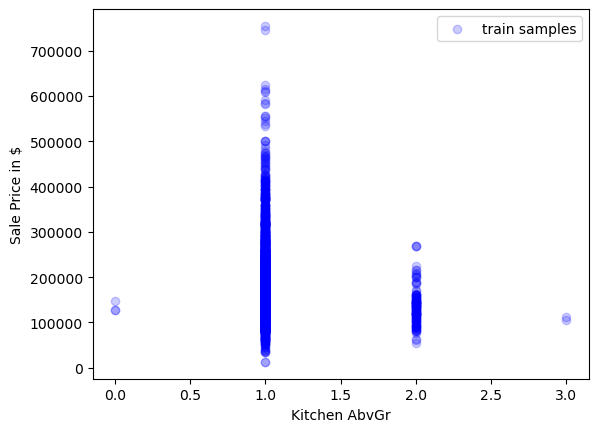

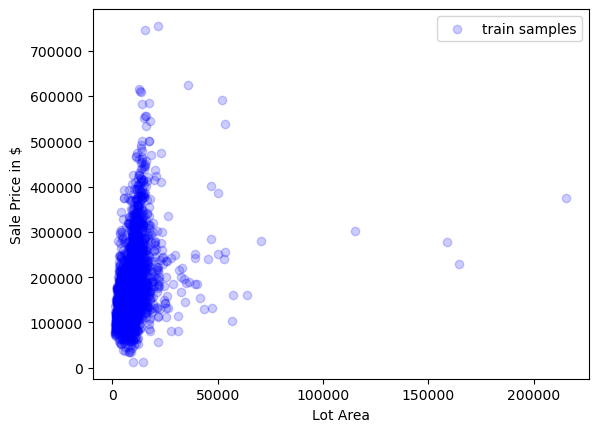

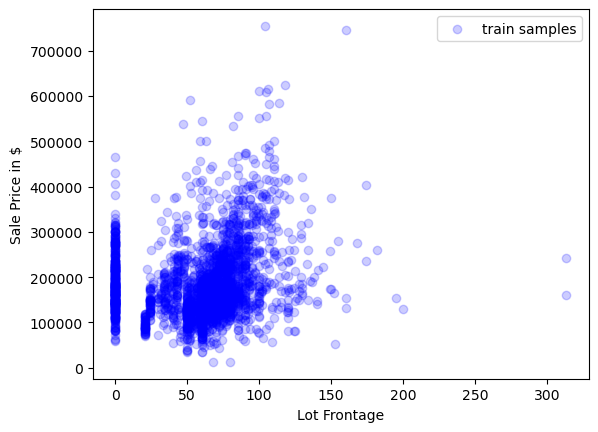

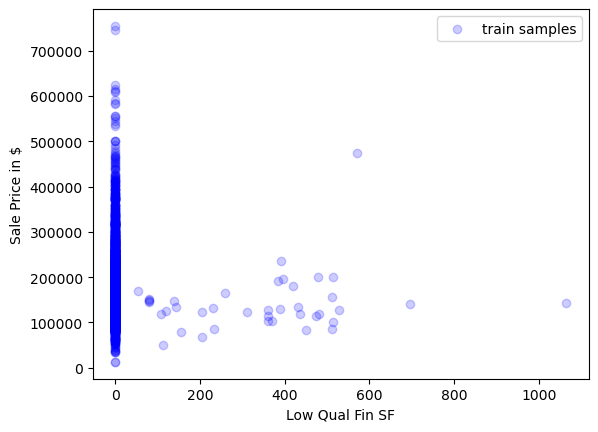

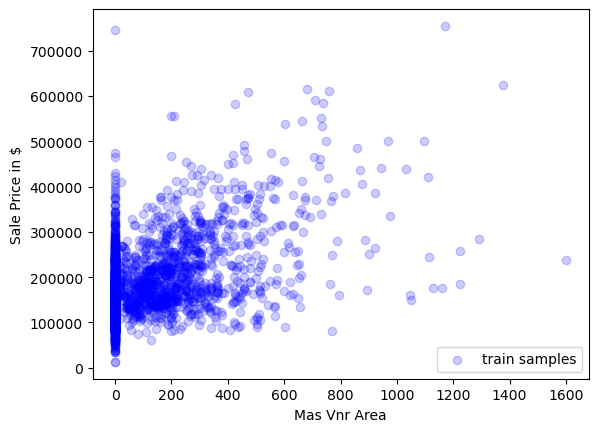

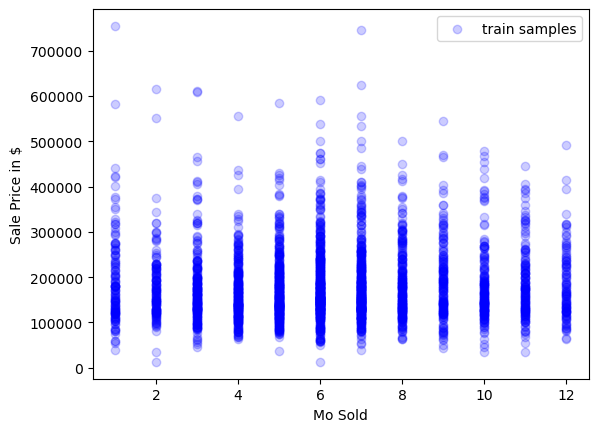

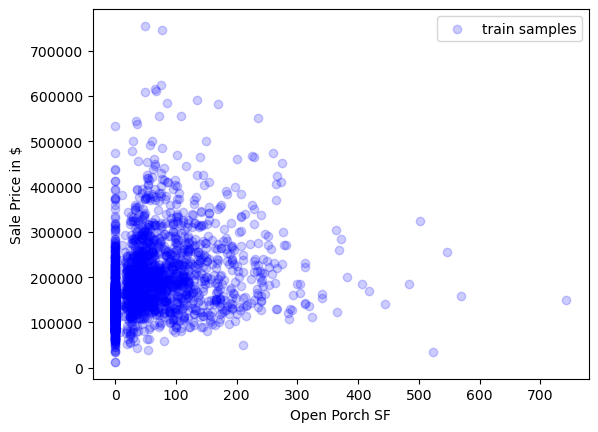

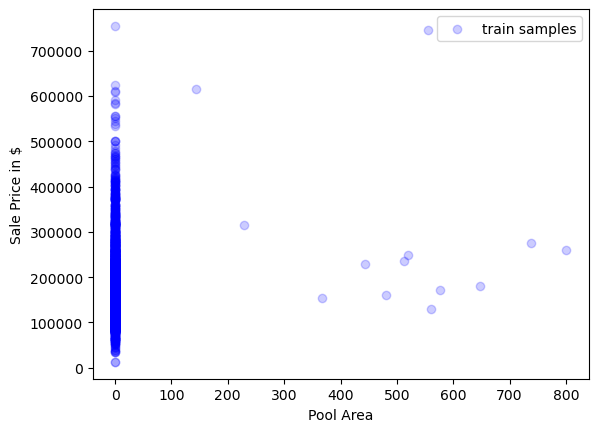

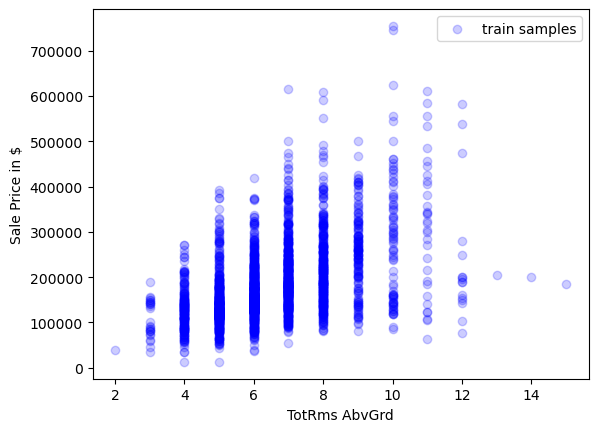

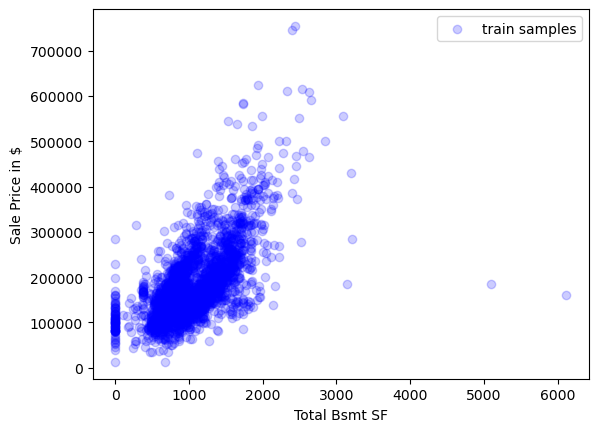

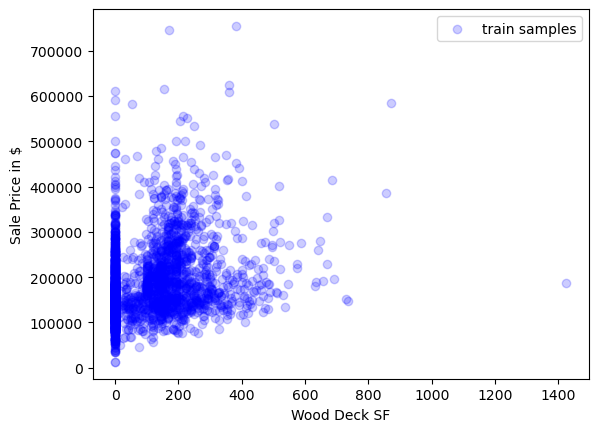

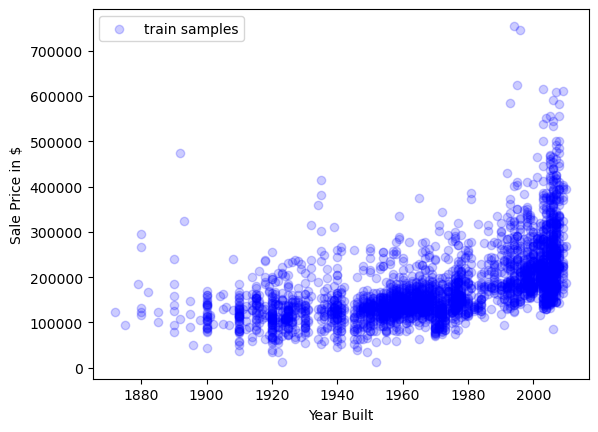

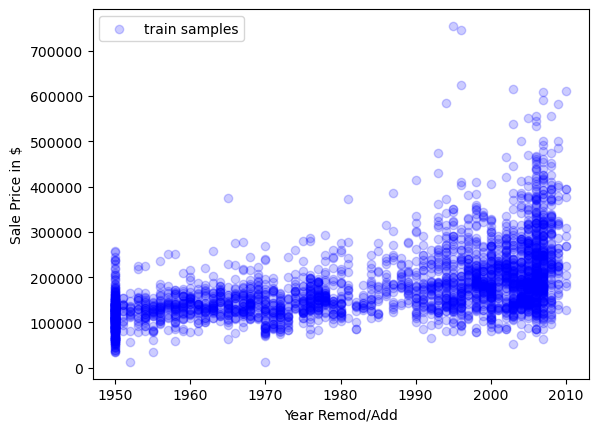

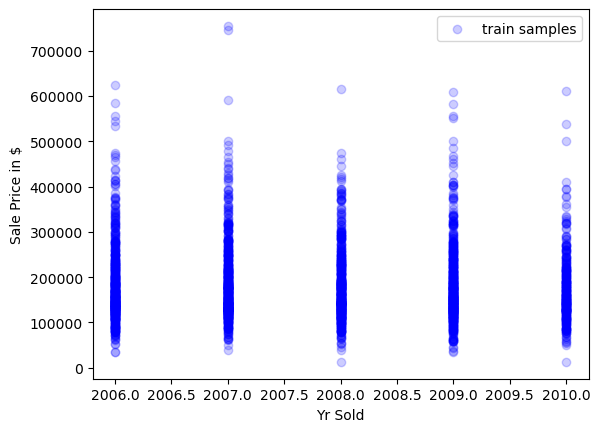

In [106]:
# Notes:
# Data not strongly correllate
# remove 'Bsmt Unf SF',
# adjust 'Garage Yr Blt' - notice poor logic of replacing NA values with 0 - created outliers/data scaling issue
# watch out for scaling - Lot Area
%matplotlib inline
# How many columns do we have?
print(len(columns))

# for each feature, show how it relates to sales price
for i in range(0,len(columns)):
    # by specifying a figure, the plotter will create multiple figures
    plt.figure(i)
    plt.scatter(X_NN[:,i], Y, alpha=.2, color='blue', label='train samples')
#     plt.scatter(housing_X_train[:,i], housing_Y_train, alpha=.3, color='black', label='train samples')
#     plt.scatter(housing_X_test[:,i], housing_Y_test, alpha=.3, color='red', label='test samples')
#     plt.scatter(housing_X_test[:,i], housing_Y_pred_nn,color='magenta', linewidth=1, alpha=.5, label='predictions')

    plt.xticks()
    plt.yticks()
    plt.legend()
    plt.xlabel(columns[i])
    plt.ylabel('Sale Price in $')

    plt.show();

## Which Features Are Not Useful?
Let's remove all of the features that seem less useful and run it again...

Just go up to the cell that has our feature columns and comment out (command+/) any fields you want to remove.

What's the best score you can get?

## Box Plots

Some of the scatter plots only have whole numbers on the x-axis. This makes it difficult to look at them and decide whether the features represented in those graphs are useful or not since the graphs are not continuous. The following box plots make it easier to look at these features and decide whether they are useful based on the amount of overlap between the box plots in each graph. If there is a lot of overlap between box plots, then the feature they are representing is not useful. If there is not a lot of overlap between box plots, then the feature they are representing is useful.

For information on what box plots are and how to read them, see https://en.wikipedia.org/wiki/Box_plot.

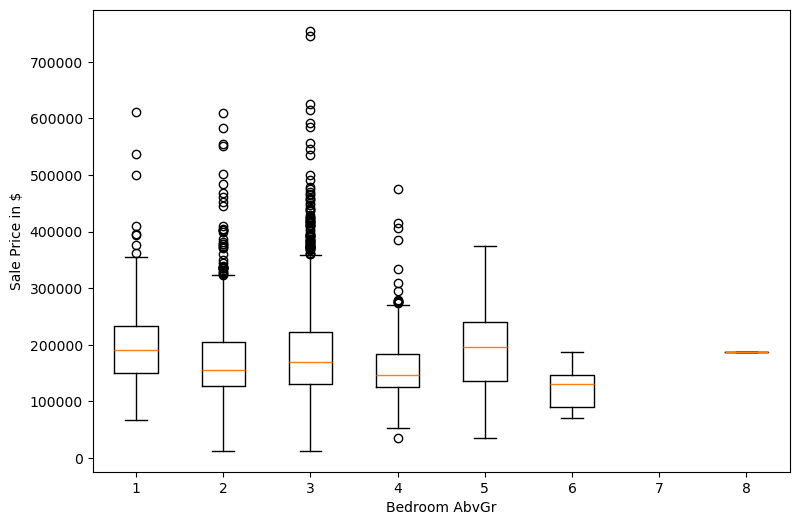

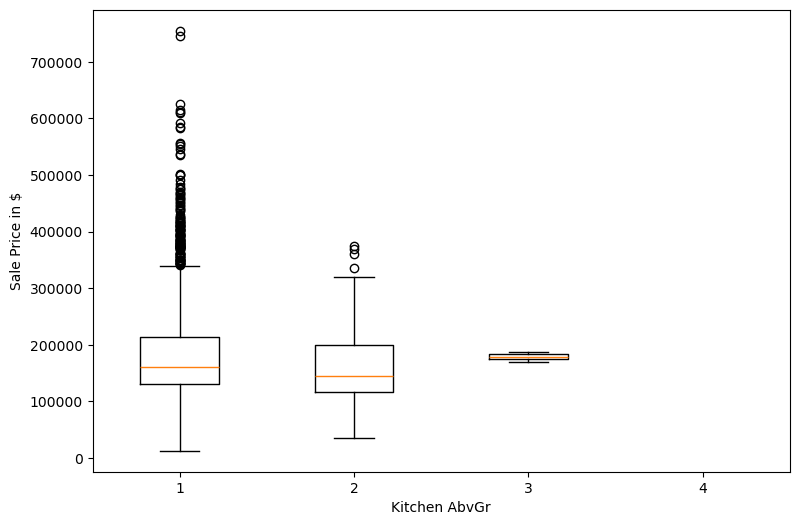

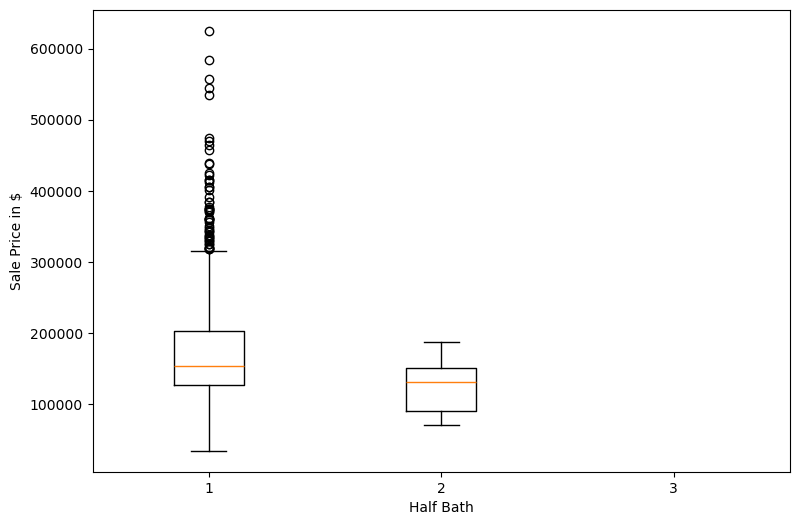

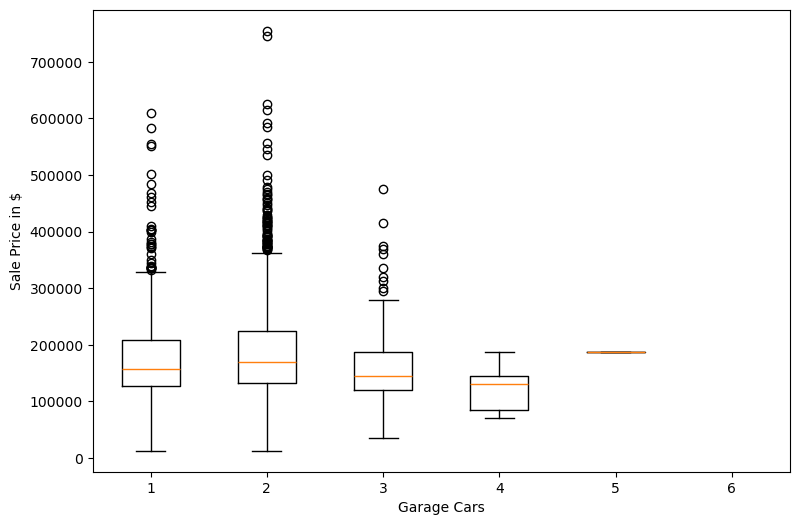

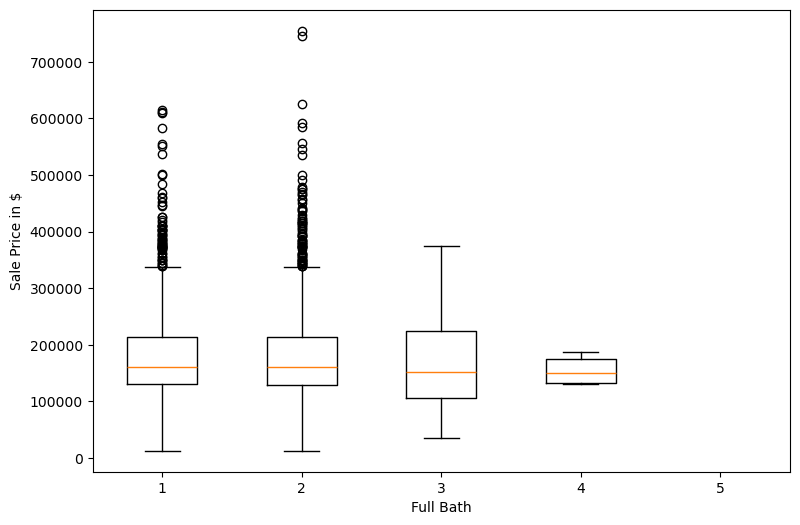

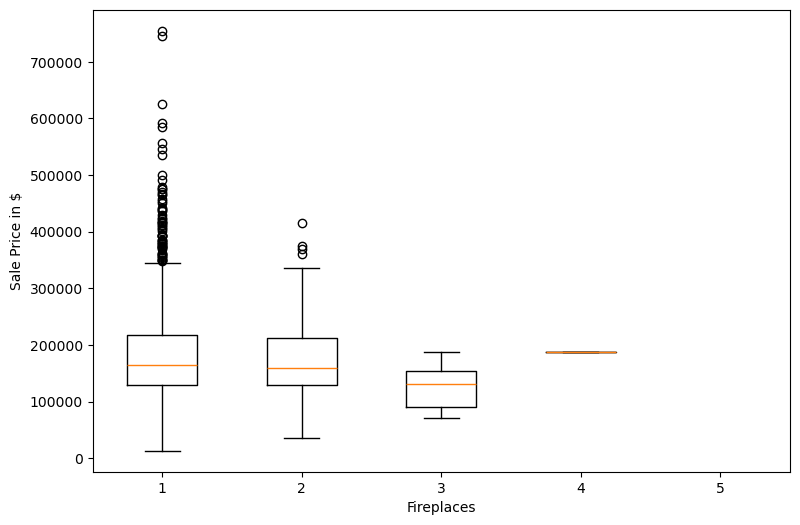

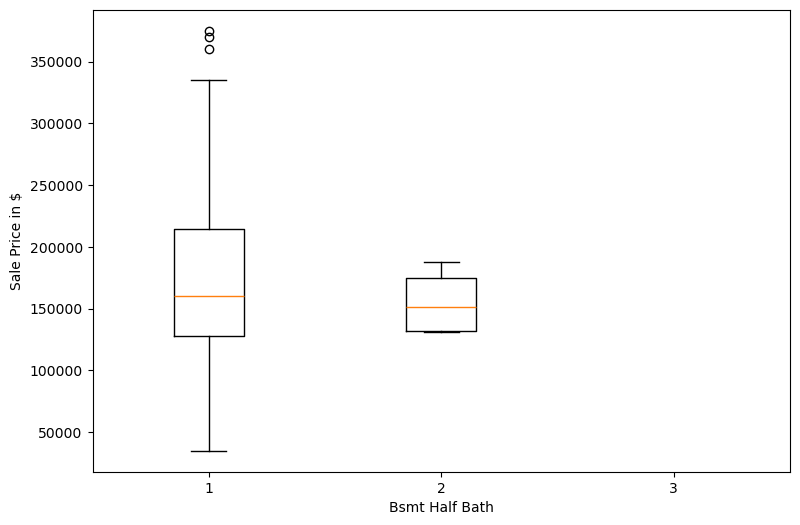

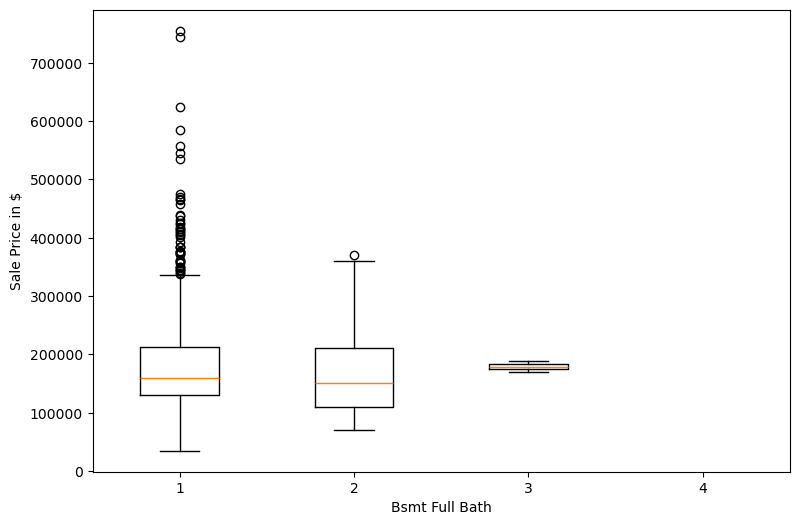

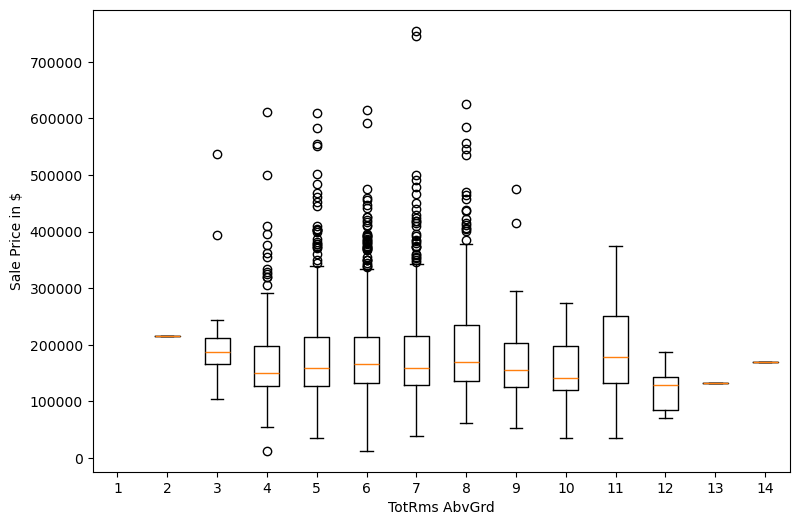

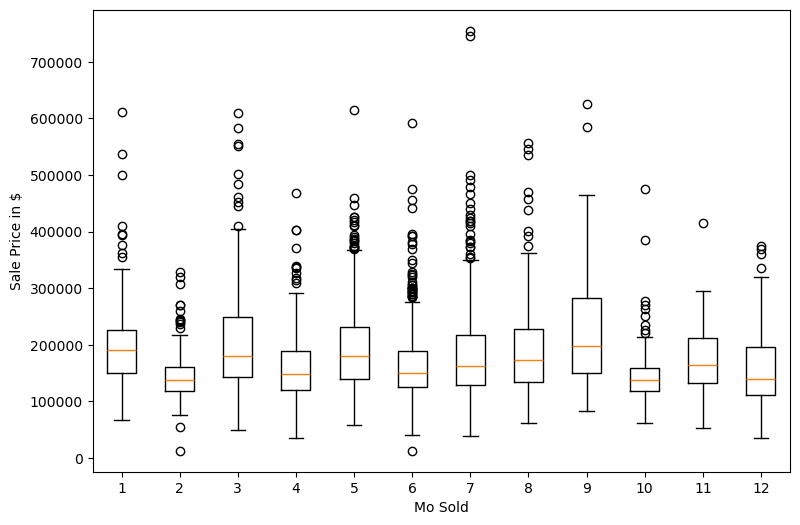

In [109]:
%matplotlib inline
import numpy

def createBoxplot(attribute, figNum):
    for i in range(0, len(columns)):
        a = []
        if(columns[i] == attribute):
            a = X_NN[:,i]
            break
    unique, counts = numpy.unique(a, return_counts = True)
    d = dict(zip(unique, counts))
    index = 0
    if 0 in d:
        index = d[0];
    pltNum = 1
    data_to_plot = list()
    length = len(d)
    while pltNum <= length:
        temp = []
        if pltNum in d:
            endIndex = index + d[pltNum]
            temp = []
            while index < endIndex:
                temp = numpy.append(temp,Y[index])
                index = index + 1
        data_to_plot.append(temp)
        pltNum = pltNum + 1
    fig = plt.figure(figNum, figsize=(9,6))
    ax = fig.add_subplot(111)
    bp = ax.boxplot(data_to_plot)
    fig.savefig("fig"+str(figNum)+".png", bbox_inches='tight')
    plt.xlabel(attribute)
    plt.ylabel("Sale Price in $")
        
createBoxplot("Bedroom AbvGr", 1)
createBoxplot("Kitchen AbvGr", 2)
createBoxplot("Half Bath", 3)
createBoxplot("Garage Cars", 4)
createBoxplot("Full Bath", 5)
createBoxplot("Fireplaces", 6)
createBoxplot("Bsmt Half Bath", 7)
createBoxplot("Bsmt Full Bath", 8)
createBoxplot("TotRms AbvGrd", 9)
createBoxplot("Mo Sold", 10)

## The Number of Zeros in Each Column 
Many of the scatter plots show features with 0s in their data. Most of the time, these 0s are just noise. For example, for the feature "2nd Flr SF", many houses had 0 in their data for this feature meaning that they did not have a second floor. It would be more meaningful for the graph to just display the data for houses that have a second floor. To do that, the houses that don't have a second floor would be excluded from the graph. It is still useful to know how many houses do not have a second floor though which is why the number of 0s for each feature should be counted even if they are excluded from the graphs.
The box plots exclude 0s from their graphs as some houses have 0s in their feature vector. That makes the resulting visualizations more meaningful.

In [110]:
#calculate the number of 0s in the columns with at least one 0. These 0s are left out of the box chart data
for i in range(0, len(columns)):
    numZeros = 0
    a = X_NN[:,i]
    for j in range(0, len(a)):
        if(a[j]) == 0:
            numZeros = numZeros + 1
    if(numZeros > 0):
        print(columns[i] + ": " + str(numZeros))

2nd Flr SF: 1678
3Ssn Porch: 2893
Bedroom AbvGr: 8
Bsmt Full Bath: 1709
Bsmt Half Bath: 2755
Bsmt Unf SF: 245
BsmtFin SF 1: 931
BsmtFin SF 2: 2579
Enclosed Porch: 2471
Fireplaces: 1422
Full Bath: 12
Garage Area: 158
Garage Cars: 158
Garage Yr Blt: 159
Half Bath: 1843
Kitchen AbvGr: 3
Lot Frontage: 490
Low Qual Fin SF: 2890
Mas Vnr Area: 1771
Open Porch SF: 1300
Pool Area: 2917
Total Bsmt SF: 80
Wood Deck SF: 1526


## Aggregate Graphs
The following graph shows the relationship between the total square footage in a house and the price of the house. It is an example of an aggregate graph because it adds up three different features provided in the data, "1st Flr SF", "2nd Flr SF', and "Total Bsmt SF", to compute the total square footage of each house. 
Aggregate graphs can show potentially useful relationships that aren't immediately obvious from the data provided.

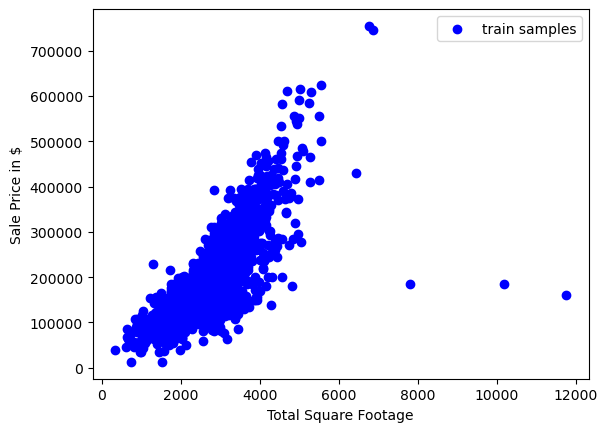

In [112]:
%matplotlib inline

#Show a plot of the total square footage in a house compared with the price
firstFloorIndex = 0
secondFloorIndex = 0
basementIndex = 0
for i in range(0, len(columns)):
    if(columns[i] == '1st Flr SF'):
        firstFloorIndex = i
    elif(columns[i] == '2nd Flr SF'):
        secondFloorIndex = i
    elif(columns[i] == 'Total Bsmt SF'):
        basementIndex = i
sumSquareFootage = []
sumSquareFootage = X_NN[:, firstFloorIndex]
sumSquareFootage = X_NN[:, secondFloorIndex] + sumSquareFootage
sumSquareFootage = X_NN[:, basementIndex] + sumSquareFootage

plt.figure(1)
plt.scatter(sumSquareFootage, Y, color = 'blue', label = 'train samples')
plt.xticks()
plt.yticks()
plt.legend()
plt.xlabel('Total Square Footage')
plt.ylabel('Sale Price in $')
plt.show()

## Next Up
[Where Do You Go From Here?](07%20-%20From%20Here.ipynb)